<a href="https://colab.research.google.com/github/martydom/startup-funding-prediction/blob/main/Devashish_Bose_Team_1_Startup_Funding_Prediction_Capstone_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4/Week 4/data_driven_investment_1.csv')

In [4]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502175 entries, 0 to 1502174
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500693 non-null  object 
 1   month                 1502175 non-null  int64  
 2   Application Category  1502175 non-null  object 
 3   Avg_Session_Time      877732 non-null   float64
 4   Business Models       2414 non-null     object 
 5   City                  2407 non-null     object 
 6   Company Stage         2414 non-null     object 
 7   Feed Name             2414 non-null     object 
 8   Founded Year          2414 non-null     float64
 9   Latest Funded Date    2414 non-null     object 
 10  MAU                   118087 non-null   float64
 11  Open_Rate             877715 non-null   float64
 12  Overview              2414 non-null     object 
 13  Practice Areas        2414 non-null     object 
 14  Reach                 1050875 non-

In [ ]:
df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year',
       'Latest Funded Date', 'MAU', 'Open_Rate', 'Overview', 'Practice Areas',
       'Reach', 'Region', 'Total Funding (USD)', 'Total_Session_Time',
       'Uninstall_Rate', 'funding_ind'],
      dtype='object')

In [ ]:
a=list(set(df[df['funding_ind']==0]['UUID'])|set(df[df['funding_ind']==1]['UUID']))

In [ ]:
df[df['UUID'].isin(a)]['Company Stage'].value_counts()

Seed        1116
Series A     344
Series B     339
Series C     277
Series D     158
Acquired      49
Series I      37
Series H      36
Series F      35
Series E      16
Funded         4
Series G       3
Name: Company Stage, dtype: int64

In [ ]:
df[df['UUID'].isin(a)][df['Company Stage'] == 'Series C' ]

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
15453,4f765967ae5af21b3b308d8f24859154856f6e39,20190601,Health & Fitness,NaN,Fitness & Wellness Tech > Physical Fitness > T...,Mumbai,Series C,Fitness & Wellness Tech,2014.0,2019-09-03,NaN,NaN,Provider of a wearable wristband integrated wi...,HealthTech,0.002397,National,50000000.0,NaN,0.225067,1
17564,23d541435e7de625f63a9e0a1db5d69e8a5ba73a,20190601,Finance,NaN,Alternative Lending > Online Lenders > Consume...,Mumbai,Series C,Alternative Lending,2015.0,2019-07-24,NaN,NaN,Online marketplace for consumer loans,FinTech,0.002302,National,42857418.0,NaN,0.137079,1
20063,23d541435e7de625f63a9e0a1db5d69e8a5ba73a,20190601,Finance,NaN,Alternative Lending > Online Lenders > Consume...,Mumbai,Series C,Alternative Lending,2015.0,2019-07-24,NaN,NaN,Online marketplace for consumer loans,FinTech,0.000077,National,42857418.0,NaN,0.232143,1
20969,d0a6897e4b40d367bbce418886a3b4d6aa0931fb,20190601,Medical,NaN,Healthcare Booking Platforms > Pharmacies > Dr...,Kolkata,Series C,Healthcare Booking Platforms\nFitness & Wellne...,2013.0,2019-09-26,NaN,NaN,Provider of an online marketplace for health c...,HealthTech\nHealthTech,0.002332,National,48173700.0,NaN,0.075355,1
23226,ecf935ba27ed8a07a064be761217c441df7a0e91,20190601,Shopping,NaN,Second Hand Goods > Electronics > Outright Buy...,Delhi,Series C,Second Hand Goods\nConsumer Electronics E-Comm...,2013.0,2019-07-16,NaN,NaN,Online platform for buy-back platform for use...,Retail\nUnbundling of Craigslist\nRetail,0.003632,National,22496045.0,NaN,0.127694,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489602,656db110df94bf85ba1a69b6181dde891b8acfa7,20190101,Finance,NaN,Payments > Business Payments > Bill Payments,Mumbai,Series C,Payments,2000.0,2019-02-15,NaN,NaN,Bill payment platform for businesses,FinTech,0.000067,National,245543240.0,NaN,0.000000,1
1489603,656db110df94bf85ba1a69b6181dde891b8acfa7,20190101,Finance,NaN,Payments > Business Payments > Bill Payments,Mumbai,Series C,Payments,2000.0,2019-02-15,NaN,NaN,Bill payment platform for businesses,FinTech,0.000049,National,245543240.0,NaN,0.000000,1
1489604,656db110df94bf85ba1a69b6181dde891b8acfa7,20190101,Finance,NaN,Payments > Business Payments > Bill Payments,Mumbai,Series C,Payments,2000.0,2019-02-15,NaN,NaN,Bill payment platform for businesses,FinTech,0.000255,National,245543240.0,NaN,0.028037,1
1489605,656db110df94bf85ba1a69b6181dde891b8acfa7,20190101,Finance,NaN,Payments > Business Payments > Bill Payments,Mumbai,Series C,Payments,2000.0,2019-02-15,NaN,NaN,Bill payment platform for businesses,FinTech,0.000382,National,245543240.0,NaN,0.046296,1


In [ ]:
df[df['Company Stage'] == 'Series F' ]

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
176664,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20200301,Shopping,0.812709,Online Grocery > B2C Ecommerce > Multi Categor...,Bangalore,Series F,Online Grocery,2011.0,2020-04-08,0.143791,2.488860,Online marketplace of grocery products,Food Tech,9.897911e-04,National,787555202.0,1.984477,NaN,1
176665,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20200301,Shopping,2.193630,Online Grocery > B2C Ecommerce > Multi Categor...,Bangalore,Series F,Online Grocery,2011.0,2020-04-08,0.311134,4.136733,Online marketplace of grocery products,Food Tech,3.442891e-02,National,787555202.0,9.034889,0.076882,1
301123,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20200301,Shopping,1.387298,Online Grocery > B2C Ecommerce > Multi Categor...,Bangalore,Series F,Online Grocery,2011.0,2020-04-08,0.332429,3.290127,Online marketplace of grocery products,Food Tech,3.368721e-03,National,787555202.0,4.566661,0.080505,1
399074,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20200301,Business,0.966202,Online Grocery > B2C Ecommerce > Multi Categor...,Bangalore,Series F,Online Grocery,2011.0,2020-04-08,NaN,39.309645,Online marketplace of grocery products,Food Tech,1.084649e-05,National,787555202.0,37.694707,NaN,1
434850,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20200201,Shopping,2.133662,Online Grocery > B2C Ecommerce > Multi Categor...,Bangalore,Series F,Online Grocery,2011.0,2020-04-08,0.435292,3.281254,Online marketplace of grocery products,Food Tech,3.737967e-02,National,787555202.0,7.004591,0.087640,1
442470,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20200201,Shopping,1.786724,Online Grocery > B2C Ecommerce > Multi Categor...,Bangalore,Series F,Online Grocery,2011.0,2020-04-08,0.437500,3.091467,Online marketplace of grocery products,Food Tech,4.022190e-03,National,787555202.0,5.463005,0.081001,1
448620,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20200201,Shopping,0.825052,Online Grocery > B2C Ecommerce > Multi Categor...,Bangalore,Series F,Online Grocery,2011.0,2020-04-08,0.392000,2.880574,Online marketplace of grocery products,Food Tech,NaN,National,787555202.0,2.398565,1.000000,1
532858,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20200201,Business,0.913782,Online Grocery > B2C Ecommerce > Multi Categor...,Bangalore,Series F,Online Grocery,2011.0,2020-04-08,NaN,40.362319,Online marketplace of grocery products,Food Tech,NaN,National,787555202.0,37.130258,NaN,1
550030,e7e679f0785892c0cd0f58a1753adefda0d6415d,20190301,Shopping,NaN,Auto E-Commerce & Content > Second Hand Vehicl...,Gurgaon,Series F,Auto E-Commerce & Content\nSecond Hand Goods,2014.0,2019-06-20,NaN,NaN,AI-driven marketplace for multi-category used ...,Consumer\nAuto Tech\nRetail\nUnbundling of Cra...,2.200508e-03,National,141580500.0,NaN,0.192598,1
550031,e7e679f0785892c0cd0f58a1753adefda0d6415d,20190301,Business,NaN,Auto E-Commerce & Content > Second Hand Vehicl...,Gurgaon,Series F,Auto E-Commerce & Content\nSecond Hand Goods,2014.0,2019-06-20,NaN,NaN,AI-driven marketplace for multi-category used ...,Consumer\nAuto Tech\nRetail\nUnbundling of Cra...,1.288678e-03,National,141580500.0,NaN,0.136000,1


In [13]:
df[df['UUID']=='4f765967ae5af21b3b308d8f24859154856f6e39'].sort_values('month')

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
793870,4f765967ae5af21b3b308d8f24859154856f6e39,20180701,Health & Fitness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000953,National,NaN,NaN,0.035354,0
1848,4f765967ae5af21b3b308d8f24859154856f6e39,20180801,Health & Fitness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001248,National,NaN,NaN,0.109375,0
717812,4f765967ae5af21b3b308d8f24859154856f6e39,20180901,Health & Fitness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001247,National,NaN,NaN,0.164009,0
806794,4f765967ae5af21b3b308d8f24859154856f6e39,20181001,Health & Fitness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001026,National,NaN,NaN,0.134269,0
820656,4f765967ae5af21b3b308d8f24859154856f6e39,20181101,Health & Fitness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001035,National,NaN,NaN,0.114447,0
747544,4f765967ae5af21b3b308d8f24859154856f6e39,20181201,Health & Fitness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000974,National,NaN,NaN,0.134969,0
1489526,4f765967ae5af21b3b308d8f24859154856f6e39,20190101,Health & Fitness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000871,National,NaN,NaN,0.057307,0
419682,4f765967ae5af21b3b308d8f24859154856f6e39,20190201,Health & Fitness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001106,National,NaN,NaN,0.078040,0
538873,4f765967ae5af21b3b308d8f24859154856f6e39,20190301,Health & Fitness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003348,National,NaN,NaN,0.107330,0
1106819,4f765967ae5af21b3b308d8f24859154856f6e39,20190401,Health & Fitness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003727,National,NaN,NaN,0.280492,0


In [ ]:
temp = df[df['UUID']=='23d541435e7de625f63a9e0a1db5d69e8a5ba73a'].sort_values('month')
temp[temp['funding_ind']==1]

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
1111308,23d541435e7de625f63a9e0a1db5d69e8a5ba73a,20190401,Finance,NaN,Alternative Lending > Online Lenders > Consume...,Mumbai,Series C,Alternative Lending,2015.0,2019-07-24,NaN,NaN,Online marketplace for consumer loans,FinTech,0.000086,National,42857418.0,NaN,0.360656,1
1108877,23d541435e7de625f63a9e0a1db5d69e8a5ba73a,20190401,Finance,NaN,Alternative Lending > Online Lenders > Consume...,Mumbai,Series C,Alternative Lending,2015.0,2019-07-24,NaN,NaN,Online marketplace for consumer loans,FinTech,0.002493,National,42857418.0,NaN,0.278628,1
1396236,23d541435e7de625f63a9e0a1db5d69e8a5ba73a,20190501,Finance,NaN,Alternative Lending > Online Lenders > Consume...,Mumbai,Series C,Alternative Lending,2015.0,2019-07-24,NaN,NaN,Online marketplace for consumer loans,FinTech,0.000078,National,42857418.0,NaN,0.237288,1
1393762,23d541435e7de625f63a9e0a1db5d69e8a5ba73a,20190501,Finance,NaN,Alternative Lending > Online Lenders > Consume...,Mumbai,Series C,Alternative Lending,2015.0,2019-07-24,NaN,NaN,Online marketplace for consumer loans,FinTech,0.002374,National,42857418.0,NaN,0.188604,1
17564,23d541435e7de625f63a9e0a1db5d69e8a5ba73a,20190601,Finance,NaN,Alternative Lending > Online Lenders > Consume...,Mumbai,Series C,Alternative Lending,2015.0,2019-07-24,NaN,NaN,Online marketplace for consumer loans,FinTech,0.002302,National,42857418.0,NaN,0.137079,1
20063,23d541435e7de625f63a9e0a1db5d69e8a5ba73a,20190601,Finance,NaN,Alternative Lending > Online Lenders > Consume...,Mumbai,Series C,Alternative Lending,2015.0,2019-07-24,NaN,NaN,Online marketplace for consumer loans,FinTech,0.000077,National,42857418.0,NaN,0.232143,1


In [ ]:
df[df['UUID']=='9e79fdcc1b7c5548ecc96b7b87da72f42a9474db'].sort_values('month')

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
799932,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20180701,Shopping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000218,National,NaN,NaN,0.022727,0
793922,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20180701,Shopping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030813,National,NaN,NaN,0.052460,0
1901,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20180801,Shopping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033147,National,NaN,NaN,0.111184,0
8126,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20180801,Shopping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000227,National,NaN,NaN,0.085106,0
724251,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20180901,Shopping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000210,National,NaN,NaN,0.080460,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571336,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20200601,Shopping,2.131989,NaN,NaN,NaN,NaN,NaN,NaN,0.417980,3.831418,NaN,NaN,0.035815,National,NaN,8.142936,0.106373,0
571337,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20200601,Shopping,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000010,National,NaN,NaN,NaN,0
571335,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20200601,Shopping,0.761695,NaN,NaN,NaN,NaN,NaN,NaN,0.284848,3.349693,NaN,NaN,0.000699,National,NaN,2.627065,0.118196,0
622113,9e79fdcc1b7c5548ecc96b7b87da72f42a9474db,20200601,Shopping,1.601093,NaN,NaN,NaN,NaN,NaN,NaN,0.459091,3.365484,NaN,NaN,0.003794,National,NaN,5.418140,0.119809,0


In [14]:
x = df[df['UUID']=='4f765967ae5af21b3b308d8f24859154856f6e39'].sort_values('month')

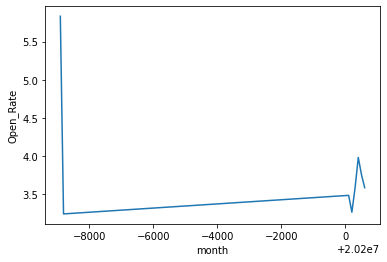

In [15]:
sns.lineplot(x=x['month'],y=x['Open_Rate'])

In [16]:
x.tail()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
434788,4f765967ae5af21b3b308d8f24859154856f6e39,20200201,Health & Fitness,1.129979,NaN,NaN,NaN,NaN,NaN,NaN,0.379592,3.257047,NaN,NaN,0.002088,National,NaN,3.682473,0.088314,0
175597,4f765967ae5af21b3b308d8f24859154856f6e39,20200301,Health & Fitness,1.140286,NaN,NaN,NaN,NaN,NaN,NaN,0.143737,3.579103,NaN,NaN,0.001621,National,NaN,4.121570,0.085134,0
1165653,4f765967ae5af21b3b308d8f24859154856f6e39,20200401,Health & Fitness,1.699084,NaN,NaN,NaN,NaN,NaN,NaN,0.346076,3.977089,NaN,NaN,0.001547,National,NaN,7.125463,0.101870,0
965117,4f765967ae5af21b3b308d8f24859154856f6e39,20200501,Health & Fitness,1.827927,NaN,NaN,NaN,NaN,NaN,NaN,0.325956,3.750325,NaN,NaN,0.001624,National,NaN,7.858938,0.093673,0
570821,4f765967ae5af21b3b308d8f24859154856f6e39,20200601,Health & Fitness,1.274170,NaN,NaN,NaN,NaN,NaN,NaN,0.400419,3.580000,NaN,NaN,0.001041,National,NaN,4.817296,0.093933,0


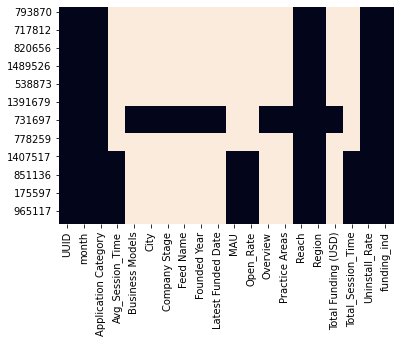

In [20]:
sns.heatmap(x.isnull(),cbar=False)

In [21]:
x[x['funding_ind']==1]

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
15453,4f765967ae5af21b3b308d8f24859154856f6e39,20190601,Health & Fitness,NaN,Fitness & Wellness Tech > Physical Fitness > T...,Mumbai,Series C,Fitness & Wellness Tech,2014.0,2019-09-03,NaN,NaN,Provider of a wearable wristband integrated wi...,HealthTech,0.002397,National,50000000.0,NaN,0.225067,1
731697,4f765967ae5af21b3b308d8f24859154856f6e39,20190701,Health & Fitness,NaN,Fitness & Wellness Tech > Physical Fitness > T...,Mumbai,Series C,Fitness & Wellness Tech,2014.0,2019-09-03,NaN,NaN,Provider of a wearable wristband integrated wi...,HealthTech,0.001985,National,50000000.0,NaN,0.171074,1
762179,4f765967ae5af21b3b308d8f24859154856f6e39,20190801,Health & Fitness,NaN,Fitness & Wellness Tech > Physical Fitness > T...,Mumbai,Series C,Fitness & Wellness Tech,2014.0,2019-09-03,NaN,NaN,Provider of a wearable wristband integrated wi...,HealthTech,0.002719,National,50000000.0,NaN,0.147094,1


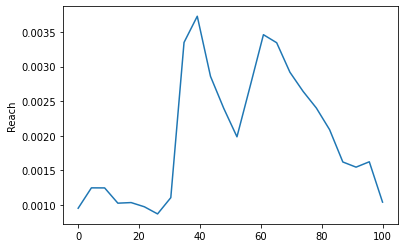

In [25]:
sns.lineplot(x=np.linspace(0,100,x.shape[0]),y=x['Reach'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


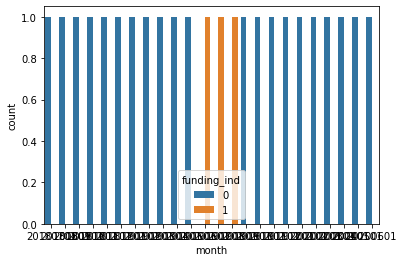

In [26]:
sns.countplot(x['month'],hue=x['funding_ind'])